# SWE2020-A MACHINE LEARNING AND BIG DATA ASSIGNMENT 3
**Machine Learning Component: Breast Cancer Diagnosis Prediction**

This script performs the following steps:
1. Loads the Breast Cancer Wisconsin Diagnostic dataset.
2. Performs basic data cleaning (removes duplicates).
3. Conducts Exploratory Data Analysis (EDA) with statistical summaries and visualizations.
4. Preprocesses the data by scaling features using StandardScaler.
5. Splits the data into training and testing sets.
6. Fine-tunes a RandomForestClassifier using GridSearchCV for optimal hyperparameters.
7. Trains the final model with the best parameters.
8. Evaluates the model's performance on the test set.
9. Saves the trained model and the StandardScaler for later deployment.
-----------------------------------------------------------------------------

In [1]:
# -----------------------------------------------------------------------------
# 1. Import Libraries
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib # For saving/loading models and scalers

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# -----------------------------------------------------------------------------
# 2. Load Dataset
# -----------------------------------------------------------------------------
print("--- 2. Loading Dataset ---")

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable to the DataFrame
df['target'] = data.target

# Map numerical target to descriptive labels for better readability
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

print(f"Dataset loaded successfully with shape: {df.shape}")
print(f"Features: {list(data.feature_names)}")
print(f"Target classes: {data.target_names}")

--- 2. Loading Dataset ---
Dataset loaded successfully with shape: (569, 31)
Features: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]
Target classes: ['malignant' 'benign']


In [3]:
# -----------------------------------------------------------------------------
# 3. Data Cleaning: Remove Duplicates
# -----------------------------------------------------------------------------
print("\n--- 3. Data Cleaning ---")

# Check for duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
duplicates_removed = initial_rows - df.shape[0]

# Display the number of duplicates removed and the new shape of the DataFrame
print(f"Removed {duplicates_removed} duplicate rows.")
print(f"Dataset shape after removing duplicates: {df.shape}")


--- 3. Data Cleaning ---
Removed 0 duplicate rows.
Dataset shape after removing duplicates: (569, 31)



--- 4. Exploratory Data Analysis (EDA) ---

Descriptive Statistics:

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.0526

/tmp/ipykernel_14900/1565119356.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='viridis')


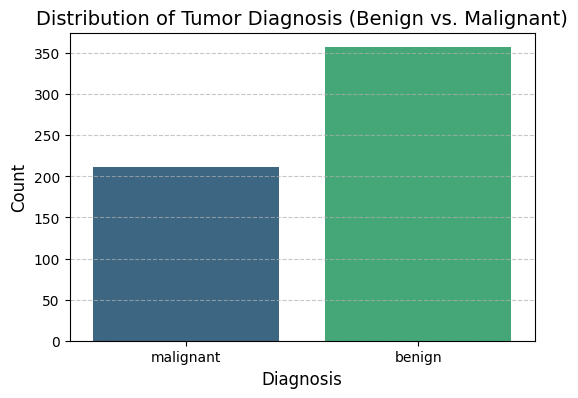

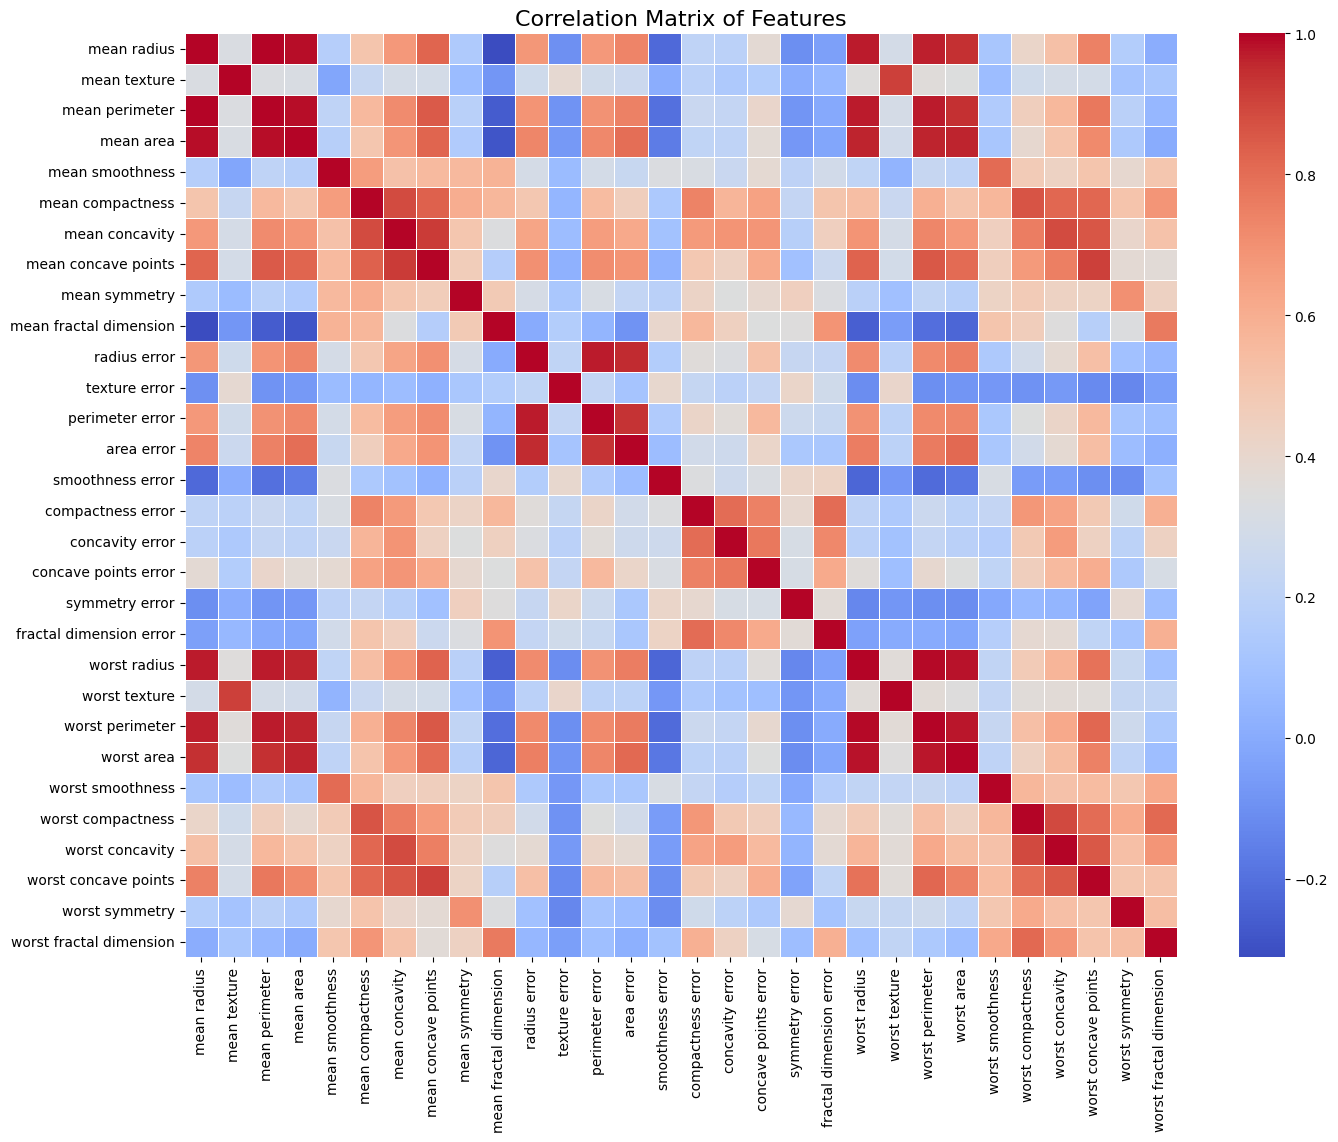

EDA completed. Visualizations displayed.


In [4]:
# -----------------------------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# -----------------------------------------------------------------------------
print("\n--- 4. Exploratory Data Analysis (EDA) ---")

# Statistical Summary
print("\nDescriptive Statistics:\n")
print(df.describe())

# Class Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='viridis')
plt.title("Distribution of Tumor Diagnosis (Benign vs. Malignant)", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig("diagnosis_distribution_visualisation.png", bbox_inches = 'tight')
plt.show()

# Feature Correlation Heatmap (for numerical features)
plt.figure(figsize=(16, 12))
correlation_matrix = df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.savefig("correlation_heatmap_visualisation.png", bbox_inches = 'tight')
plt.show()
print("EDA completed. Visualizations displayed.")

In [5]:
# -----------------------------------------------------------------------------
# 5. Preprocessing (Feature Scaling and Data Splitting)
# -----------------------------------------------------------------------------
print("\n--- 5. Data Preprocessing ---")

# Separate features (X) and target (y)
X = df.drop('target', axis = 1)
y = df['target']

# Initialize StandardScaler
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)
print("Features scaled using StandardScaler.")

# Split data into training and testing sets
# Stratify ensures that the proportion of target classes is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)
print(f"Data split into training (80%) and testing (20%) sets.")
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")



--- 5. Data Preprocessing ---
Features scaled using StandardScaler.
Data split into training (80%) and testing (20%) sets.
Training set shape: (455, 30), Test set shape: (114, 30)


In [6]:
# -----------------------------------------------------------------------------
# 6. Model Selection and Hyperparameter Tuning (RandomForestClassifier with GridSearchCV)
# -----------------------------------------------------------------------------
print("\n--- 6. Model Training & Hyperparameter Tuning (GridSearchCV) ---")

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with RandomForestClassifier and 5-fold cross-validation
# 'scoring' can be set to 'accuracy', 'f1', 'roc_auc' etc., depending on problem
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Metric to optimize for
    n_jobs=-1, # Use all available CPU cores
    verbose=1 # Display progress
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
print(f"\nBest Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")


--- 6. Model Training & Hyperparameter Tuning (GridSearchCV) ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters Found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9626



--- 7. Model Evaluation on Test Set ---


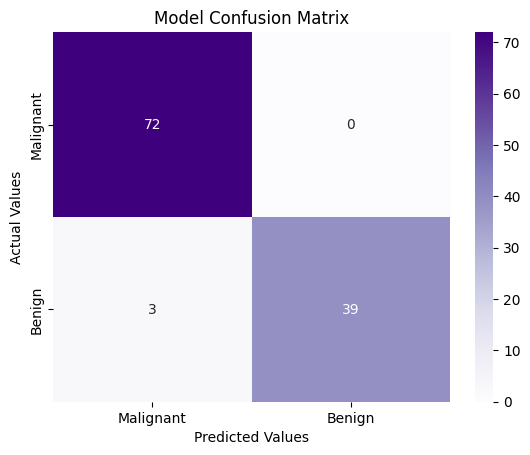


Classification Report:
               precision    recall  f1-score   support

      benign       0.96      1.00      0.98        72
   malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Overall Accuracy Score on Test Set: 0.9737


In [7]:
# -----------------------------------------------------------------------------
# 7. Model Evaluation
# -----------------------------------------------------------------------------
print("\n--- 7. Model Evaluation on Test Set ---")

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
model_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(model_cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Model Confusion Matrix')
plt.savefig("model_cm_visualisation.png", bbox_inches = 'tight')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Overall Accuracy Score on Test Set: {accuracy_score(y_test, y_pred):.4f}")

In [8]:
# -----------------------------------------------------------------------------
# 8. Save the Trained Model and Scaler
# -----------------------------------------------------------------------------
print("\n--- 8. Saving Model and Scaler ---")
# Save the trained model
joblib.dump(best_model, 'optimised_breast_cancer_model.pkl')
print("Model saved as 'optimised_breast_cancer_model.pkl'")

# Save the scaler object (crucial for preprocessing new data consistently)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

print("\nMachine Learning Pipeline Completed Successfully!")


--- 8. Saving Model and Scaler ---
Model saved as 'optimised_breast_cancer_model.pkl'
Scaler saved as 'scaler.pkl'

Machine Learning Pipeline Completed Successfully!
